<a href="https://colab.research.google.com/github/smileSD/Car-Price/blob/main/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

In [55]:
car=pd.read_csv("car_price_prediction.csv")
car.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.000,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.000,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.000,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.000,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.000,Automatic,Front,04-May,Left wheel,Silver,4


In [56]:
car.Doors.value_counts()

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

In [57]:
car=car.replace('-',np.nan)  #replacing the '-' with na values

In [58]:
car.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.000,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.000,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.000,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.000,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.000,Automatic,Front,04-May,Left wheel,White,12


In [59]:
car.shape

(19237, 18)

In [60]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              13418 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

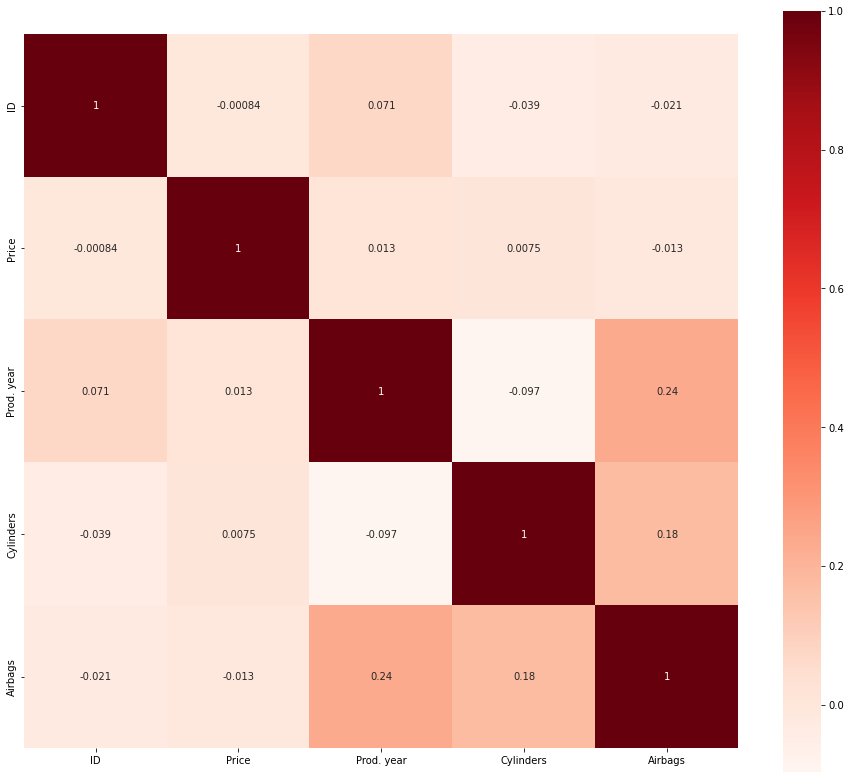

In [61]:
plt.figure(figsize=(16,14))
sns.heatmap(car.corr(),annot=True, square=True, cmap='Reds')

In [62]:
car.Mileage=car.Mileage.str.split(' ').str.get(0)   #converting the data type of mileage to integer
car.Mileage=car.Mileage.astype(int)

In [63]:
car['Engine volume']=car['Engine volume'].str.split(' ').str.get(0)
car['Engine volume']=car['Engine volume'].astype(float)

In [64]:
car.Doors=car.Doors.str.split('-').str.get(0)   #converting the data type of mileage to integer
car.Doors=car.Doors.replace('>5','05')
car.Doors=car.Doors.astype(int)

In [65]:
# car.Levy=car.Levy.astype(float)   #convert data type of levy to float

In [66]:
car.Price=car.Price.astype(str)

In [67]:
car.isna().sum()  #check the null values

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [68]:
col1 = list(car.columns)#converting to a list of the columns 
col1.remove('Price')#removing the target column as we will not evaluate it
print(list(col1))

['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags']


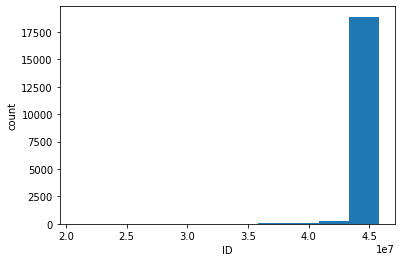

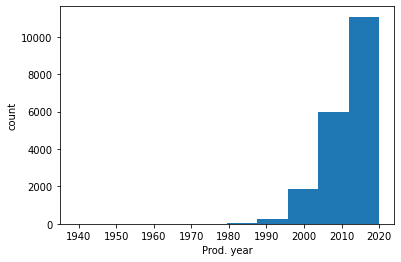

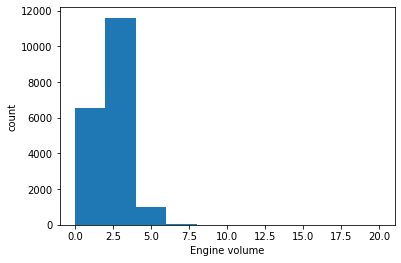

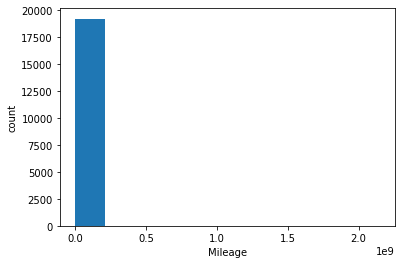

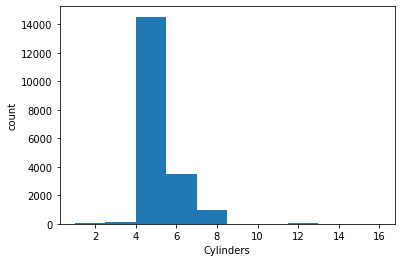

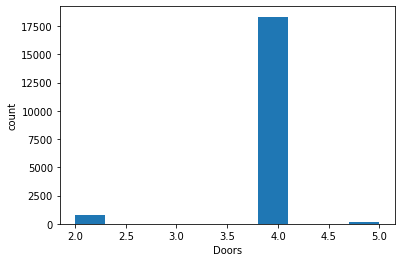

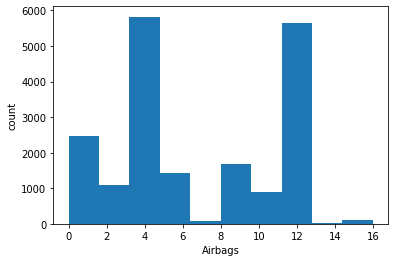

In [69]:
for col_name in col1:
  if (car[col_name].dtypes=='int64' or car[col_name].dtypes=='float64'):
    plt.hist(car[col_name])#histogram plot for all the columns to check the distribution of data points
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

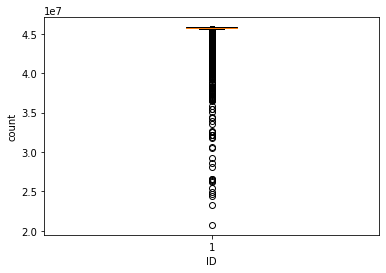

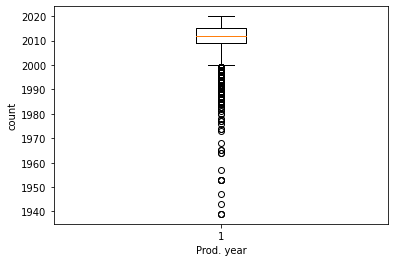

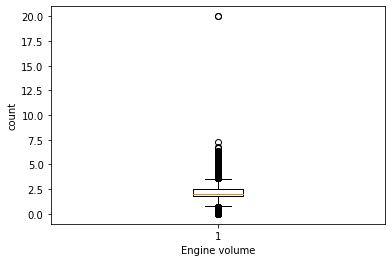

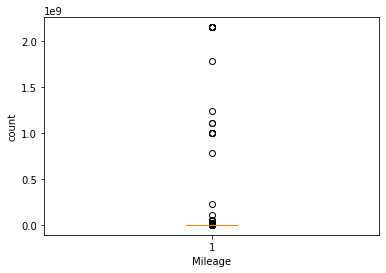

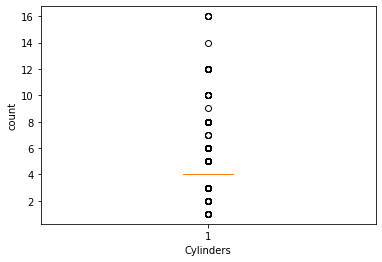

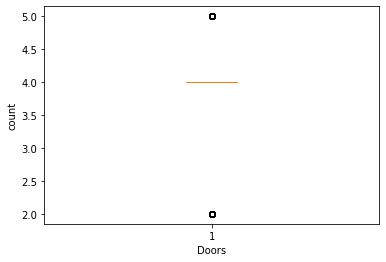

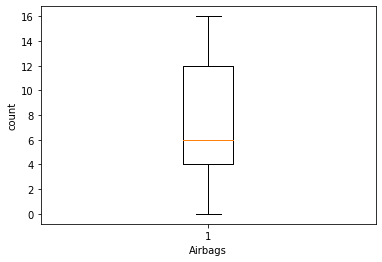

In [70]:
for col_name in col1:
  if (car[col_name].dtypes=='int64' or car[col_name].dtypes=='float64'):
    plt.boxplot(car[col_name])# making boxplot for all the columns except buy to check for outliers
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

In [71]:
Q1 = car.quantile(0.25)
Q3 = car.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ID              103,662.000
Prod. year            6.000
Engine volume         0.700
Mileage         118,749.000
Cylinders             0.000
Doors                 0.000
Airbags               8.000
dtype: float64


In [72]:
car=car[~((car < (Q1 - 1.5 * IQR)) |(car > (Q3 + 1.5 * IQR))).any(axis=1)]  #removing the outliers
car.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(11014, 18)

In [73]:
car.Levy=car.Levy.fillna(car.Levy.mode()[0])  #fill the null values with mean
car.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,891,HONDA,FIT,2006,Hatchback,No,Petrol,1.300,200000,4.000,Variator,Front,4,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.500,168966,4.000,Automatic,4x4,4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.300,91901,4.000,Automatic,Front,4,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.000,160931,4.000,Automatic,Front,4,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.800,258909,4.000,Automatic,Front,4,Left wheel,White,12


In [74]:
col_list = []   
for col in car.columns:
    if (car[col].dtype == 'object' ):
        col_list.append(col)    #making list of all the object columns

In [75]:
col_list

['Price',
 'Levy',
 'Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Wheel',
 'Color']

In [76]:

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in col_list:
    car[i]=labelencoder.fit_transform(car[i])   #converting the object to integer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [77]:
car.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,1907,306,16,281,2006,3,0,4,1.300,200000,4.000,3,1,4,1,1,2
3,45769185,1164,293,12,271,2011,4,1,2,2.500,168966,4.000,0,0,4,0,14,0
4,45809263,84,164,16,281,2014,3,1,4,1.300,91901,4.000,0,1,4,0,12,4
5,45802912,1264,306,17,561,2016,4,1,1,2.000,160931,4.000,0,1,4,0,14,4
6,45656768,458,265,42,508,2010,3,1,2,1.800,258909,4.000,0,1,4,0,14,12


In [78]:
pd.options.display.float_format = '{:,.3f}'.format

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor   #check for multi-collinearity
col_list = []
for col in car.columns:
    if ((car[col].dtype != 'object') & (col != 'Price') ):
        col_list.append(col)

X = car[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,VIF
0,ID,1.072
1,Levy,1.167
2,Manufacturer,1.234
3,Model,1.105
4,Prod. year,1.649
5,Category,1.247
6,Leather interior,1.544
7,Fuel type,1.264
8,Engine volume,1.250
9,Mileage,1.178


In [96]:
Ind_Features=list(vif_data.feature)  #taking all the relevant less correlated independent columns
Ind_Features

['ID',
 'Levy',
 'Manufacturer',
 'Model',
 'Prod. year',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Cylinders',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags']

In [97]:
x=car[Ind_Features]
x

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,306,16,281,2006,3,0,4,1.300,200000,4.000,3,1,4,1,1,2
3,45769185,293,12,271,2011,4,1,2,2.500,168966,4.000,0,0,4,0,14,0
4,45809263,164,16,281,2014,3,1,4,1.300,91901,4.000,0,1,4,0,12,4
5,45802912,306,17,561,2016,4,1,1,2.000,160931,4.000,0,1,4,0,14,4
6,45656768,265,42,508,2010,3,1,2,1.800,258909,4.000,0,1,4,0,14,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,45760891,226,42,508,2011,3,1,2,1.800,307325,4.000,0,1,4,0,12,12
19233,45778856,286,17,575,2011,8,1,4,2.400,161600,4.000,2,1,4,0,11,8
19234,45804997,290,17,621,2010,4,1,1,2.000,116365,4.000,0,1,4,0,7,4
19235,45793526,60,5,180,2007,4,1,1,2.000,51258,4.000,0,1,4,0,1,4


In [98]:
y=car['Price']  #target column
y

2        1907
3        1164
4          84
5        1264
6         458
         ... 
19230    1468
19233     316
19234     831
19235    1595
19236    1468
Name: Price, Length: 11014, dtype: int64

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.25, random_state=0)  #split the dataset into 75:25

In [100]:
folds   = 3
metric  = "neg_mean_absolute_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["DecisionTree"]  = DecisionTreeRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["XGBoostRegressor"]=XGBRegressor()

# 3-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
	model   = models[model_name]
	k_fold  = KFold(n_splits=folds)
	results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)  #to find which model to use
	
	model_results.append(results)
	model_names.append(model_name)
	print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

Linear: -500.538, 2.373
DecisionTree: -365.304, 8.54
RandomForest: -302.818, 0.56
[10:33:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoostRegressor: -400.399, 1.56


In [101]:
model=RandomForestRegressor(n_estimators=500)  
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=500)

In [102]:
X_test

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
4977,45771607,306,42,79,2013,3,0,2,1.500,98000,4.000,0,1,4,1,14,8
7774,45748853,306,30,462,2005,3,0,4,1.500,0,4.000,0,1,4,1,7,4
1901,45745267,306,42,508,2006,3,0,2,1.500,174000,4.000,3,1,4,0,11,6
10976,45815237,273,42,528,2012,4,0,4,2.500,159901,4.000,0,1,4,0,3,12
9038,45801846,237,17,256,2010,8,1,4,1.600,115783,4.000,0,1,4,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17225,45815152,22,42,637,2010,4,1,4,2.700,176437,4.000,0,0,4,0,14,12
3542,45805904,204,17,256,2014,8,1,4,1.800,149000,4.000,2,1,4,0,7,10
8087,45802568,306,17,561,2016,4,1,1,2.000,128994,4.000,0,1,4,0,14,4
3193,45732981,221,17,575,2014,8,1,3,2.000,55210,4.000,0,1,4,0,12,4


In [103]:
Y_test

4977      242
7774      974
1901       78
10976    1704
9038      200
         ... 
17225    1259
3542      316
8087     1267
3193       21
2924     1555
Name: Price, Length: 2754, dtype: int64

In [104]:
y_predict = model.predict(X_test)  #predicting from the trained model
y_predict

array([ 324.552, 1058.526,  324.12 , ..., 1465.954,  456.504, 1368.014])

In [105]:
error_percent = np.mean(np.abs((Y_test - y_predict) / Y_test)) * 100
print("Mean Absolute Percentage Error (TEST DATA): ",error_percent )

Mean Absolute Percentage Error (TEST DATA):  342.88879817803155


In [106]:
print("RMSE : %.4g" % np.sqrt(mean_squared_error(Y_test, y_predict)))

RMSE : 428.6
